In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
from sklearn import preprocessing
import random
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import time

           sensor1      sensor2      sensor3      sensor4
count  5456.000000  5456.000000  5456.000000  5456.000000
mean      1.290307     0.681269     1.881819     1.273689
std       0.626700     0.342594     0.562533     0.821750
min       0.495000     0.340000     0.836000     0.367000
25%       0.826000     0.495000     1.472000     0.788000
50%       1.089500     0.612000     1.753000     1.066500
75%       1.519500     0.753000     2.139000     1.400500
max       5.000000     5.000000     5.000000     5.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sensor1  5456 non-null   float64
 1   sensor2  5456 non-null   float64
 2   sensor3  5456 non-null   float64
 3   sensor4  5456 non-null   float64
 4   move     5456 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 213.2 KB
None


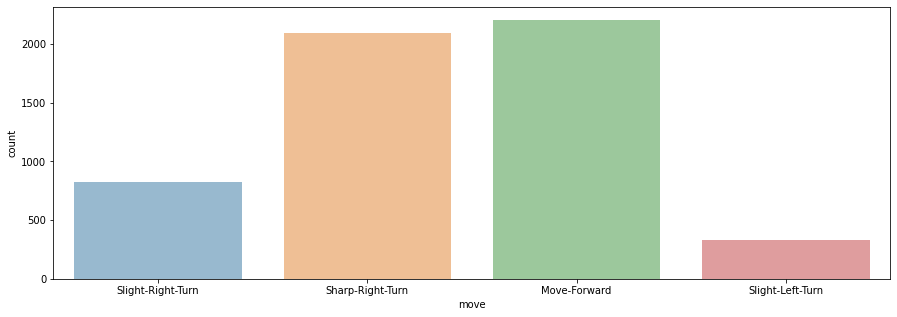

In [2]:
data = pd.read_csv("drive/MyDrive/mlp_odev/sensor_readings_4.csv")
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x='move',data=data,alpha=0.5)
print(data.describe())
le = preprocessing.LabelEncoder()
data['move']= le.fit_transform(data['move'])
print(data.info())
dt = data.iloc[:,0:4]
tg = data['move']
dataset = np.column_stack((dt,tg.T))
train = dataset[0:4365]
test = dataset[4365:5456]
train_X = np.array([i[:4] for i in train])
train_y = np.array([i[4] for i in train])
test_X = np.array([i[:4] for i in test])
test_y = np.array([i[4] for i in test])
train_X = train_X/train_X.max()
test_X = test_X/test_X.max()

In [3]:
class MultiLayerPerceptron(BaseEstimator, ClassifierMixin): 
    def __init__(self, params=None):     
        if (params == None):
            self.inputLayer = 4                        # Input Layer
            self.hiddenLayer = 10                       # Hidden Layer
            self.outputLayer = 4                       # Output Layer
            self.learningRate = 0.01                  # Learning rate
            self.max_epochs = 1000                      # Epochs
            self.iasHiddenValue = -1                   # Bias HiddenLayer
            self.BiasOutputValue = -1                  # Bias OutputLayer
            self.activation = self.ativacao['sigmoid'] # Activation function
            self.deriv = self.derivada['sigmoid']
        else:
            self.inputLayer = params['InputLayer']
            self.hiddenLayer = params['HiddenLayer']
            self.OutputLayer = params['OutputLayer']
            self.learningRate = params['LearningRate']
            self.max_epochs = params['Epocas']
            self.BiasHiddenValue = params['BiasHiddenValue']
            self.BiasOutputValue = params['BiasOutputValue']
            self.activation = self.ativacao[params['ActivationFunction']]
            self.deriv = self.derivada[params['ActivationFunction']]
        
        'Starting Bias and Weights'
        self.WEIGHT_hidden = self.starting_weights(self.hiddenLayer, self.inputLayer)
        self.WEIGHT_output = self.starting_weights(self.OutputLayer, self.hiddenLayer)
        self.BIAS_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayer)])
        self.BIAS_output = np.array([self.BiasOutputValue for i in range(self.OutputLayer)])
        self.classes_number = 4
        
    pass
    
    def starting_weights(self, x, y):
        return [[2  * random.random() - 1 for i in range(x)] for j in range(y)]

    ativacao = {
         'sigmoid': (lambda x: 1/(1 + np.exp(-x))),
            'tanh': (lambda x: np.tanh(x)),
            'Relu': (lambda x: x*(x > 0)),
               }
    derivada = {
         'sigmoid': (lambda x: x*(1-x)),
            'tanh': (lambda x: 1-x**2),
            'Relu': (lambda x: 1 * (x>0))
               }
 
    def Backpropagation_Algorithm(self, x):
        DELTA_output = []
        'Error: OutputLayer'
        ERROR_output = self.output - self.OUTPUT_L2
        DELTA_output = ((-1)*(ERROR_output) * self.deriv(self.OUTPUT_L2))
        
        arrayStore = []
        'Update weights OutputLayer and HiddenLayer'
        for i in range(self.hiddenLayer):
            for j in range(self.OutputLayer):
                self.WEIGHT_output[i][j] -= (self.learningRate * (DELTA_output[j] * self.OUTPUT_L1[i]))
                self.BIAS_output[j] -= (self.learningRate * DELTA_output[j])
      
        'Error: HiddenLayer'
        delta_hidden = np.matmul(self.WEIGHT_output, DELTA_output)* self.deriv(self.OUTPUT_L1)
 
        'Update weights HiddenLayer and InputLayer'
        for i in range(self.OutputLayer):
            for j in range(self.hiddenLayer):
                self.WEIGHT_hidden[i][j] -= (self.learningRate * (delta_hidden[j] * x[i]))
                self.BIAS_hidden[j] -= (self.learningRate * delta_hidden[j])
                
    def show_err_graphic(self,v_erro,v_epoca):
        plt.figure(figsize=(9,4))
        plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)
        plt.xlabel("Number of Epochs")
        plt.ylabel("Squared error (MSE) ")
        plt.title("Error Minimization")
        plt.show()

    def predict(self, X, y):
        my_predictions = []
        'Forward Propagation'
        forward = self.activation(np.dot(X,self.WEIGHT_hidden) + self.BIAS_hidden.T)
        forward = self.activation(np.dot(forward, self.WEIGHT_output) + self.BIAS_output.T)

        for i in forward:
            my_predictions.append(max(enumerate(i), key=lambda x:x[1])[0])

        array_score = []
        for i in range(len(my_predictions)):
            if my_predictions[i] == 0: 
                array_score.append([i, 'Slight-Right-Turn', my_predictions[i], y[i]])
            elif my_predictions[i] == 1:
                 array_score.append([i, 'Sharp-Right-Turn', my_predictions[i], y[i]])
            elif my_predictions[i] == 2:
                 array_score.append([i, 'Move-Forward', my_predictions[i], y[i]])
            elif my_predictions[i] == 3:
                 array_score.append([i, 'Slight-Left-Turn', my_predictions[i], y[i]])
        
        cm = metrics.confusion_matrix(y, my_predictions)
        print(cm)
        sns.heatmap(cm, annot=True)

        dataframe = pd.DataFrame(array_score, columns=['_id', 'class', 'output', 'hoped_output'])
        return my_predictions, dataframe

    def fit(self, X, y):  
        count_epoch = 1
        total_error = 0
        n = len(X); 
        epoch_array = []
        error_array = []
        W0 = []
        W1 = []
        while(count_epoch <= self.max_epochs):
            for idx,inputs in enumerate(X): 
                self.output = np.zeros(self.classes_number)
                'Forward Propagation'
                self.OUTPUT_L1 = self.activation((np.dot(inputs, self.WEIGHT_hidden) + self.BIAS_hidden.T))
                self.OUTPUT_L2 = self.activation((np.dot(self.OUTPUT_L1, self.WEIGHT_output) + self.BIAS_output.T))
                'One-Hot-Encoding'
                if(y[idx] == 0): 
                    self.output = np.array([1,0,0,0]) 
                elif(y[idx] == 1):
                    self.output = np.array([0,1,0,0]) 
                elif(y[idx] == 2):
                    self.output = np.array([0,0,1,0]) 
                elif(y[idx] == 3):
                    self.output = np.array([0,0,0,1]) 
                
                
                square_error = 0
                for i in range(self.OutputLayer):
                    erro = (self.output[i] - self.OUTPUT_L2[i])**2
                    square_error = (square_error + (0.01 * erro))
                    total_error = total_error + square_error
         
                'Backpropagation : Update Weights'
                self.Backpropagation_Algorithm(inputs)
                
            total_error = (total_error / n)
            if((count_epoch % 50 == 0)or(count_epoch == 1)):
                print("Epoch ", count_epoch, "- Total Error: ",total_error)
                error_array.append(total_error)
                epoch_array.append(count_epoch)
                
            W0.append(self.WEIGHT_hidden)
            W1.append(self.WEIGHT_output)

            count_epoch += 1

        self.show_err_graphic(error_array,epoch_array)
        return self


Epoch  1 - Total Error:  0.018569949964400773
Epoch  50 - Total Error:  0.009126865628316334
Epoch  100 - Total Error:  0.006888040077208226
Epoch  150 - Total Error:  0.005702136158993775
Epoch  200 - Total Error:  0.005039275498315318
Epoch  250 - Total Error:  0.004425661452854362
Epoch  300 - Total Error:  0.0035040561972954362
Epoch  350 - Total Error:  0.0032078626660606117
Epoch  400 - Total Error:  0.003027139061161292
Epoch  450 - Total Error:  0.0028884831188744258
Epoch  500 - Total Error:  0.002773713933580695
Epoch  550 - Total Error:  0.0026760867593279888
Epoch  600 - Total Error:  0.0025922646982310857
Epoch  650 - Total Error:  0.0025199952212635367
Epoch  700 - Total Error:  0.00245703427881659


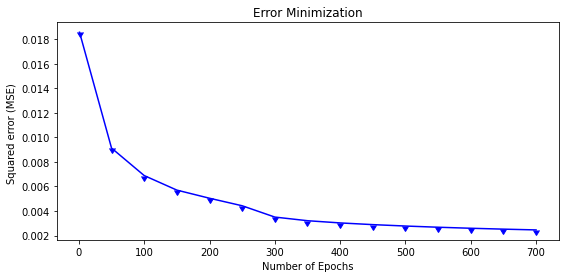

AttributeError: ignored

AttributeError: ignored

In [4]:
dictionary = {'InputLayer':4, 'HiddenLayer':10, 'OutputLayer':4,
              'Epocas':700, 'LearningRate':0.05,'BiasHiddenValue':-1, 
              'BiasOutputValue':-1, 'ActivationFunction':'sigmoid'}

Perceptron = MultiLayerPerceptron(dictionary)
Perceptron.fit(train_X,train_y)

[[387  16   0  25]
 [  4 404   0   0]
 [  8   4  95   0]
 [ 18   0   0 130]]
score slrt: 387
score shrt: 404
score mf: 95
score slt: 130


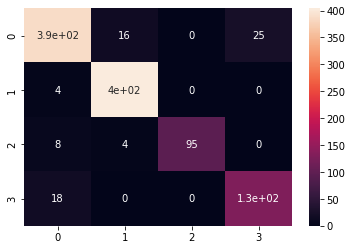

In [5]:
prev, dataframe = Perceptron.predict(test_X, test_y)
hits = n_slrt = n_shrt = n_mf = n_slt = 0
score_slrt = score_shrt = score_mf = score_slt = 0
for j in range(len(test_y)):
    if(test_y[j] == 0): n_slrt += 1
    elif(test_y[j] == 1): n_shrt += 1
    elif(test_y[j] == 2): n_mf += 1
    elif(test_y[j] == 3): n_slt += 1
        
for i in range(len(test_y)):
    if test_y[i] == prev[i]: 
        hits += 1
    if test_y[i] == prev[i] and test_y[i] == 0:
        score_slrt += 1
    elif test_y[i] == prev[i] and test_y[i] == 1:
        score_shrt += 1
    elif test_y[i] == prev[i] and test_y[i] == 2:
        score_mf += 1
    elif test_y[i] == prev[i] and test_y[i] == 3:
        score_slt += 1
            
print("score slrt:", score_slrt)
print("score shrt:", score_shrt)
print("score mf:", score_mf)
print("score slt:", score_slt)
hits = (hits / len(test)) * 100
faults = 100 - hits

Porcents : 93.13 % hits and 6.87 % faults
Total samples of test 1091
Slight-Right-Turn: 428 samples
Sharp-Right-Turn: 408 samples
Move-Forward: 107 samples
Slight-Left-Turn: 148 samples


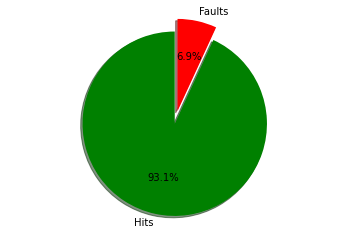

In [6]:
graph_hits = []
print("Porcents :","%.2f"%(hits),"% hits","and","%.2f"%(faults),"% faults")
print("Total samples of test",1091)
print("Slight-Right-Turn:",n_slrt,"samples")
print("Sharp-Right-Turn:",n_shrt,"samples")
print("Move-Forward:",n_mf,"samples")
print("Slight-Left-Turn:",n_slt,"samples")

graph_hits.append(hits)
graph_hits.append(faults)
labels = 'Hits', 'Faults';
sizes = [96.5, 3.3]
explode = (0, 0.14)

fig1, ax1 = plt.subplots();
ax1.pie(graph_hits, explode=explode,colors=['green','red'],labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

[[1687   53    0   37]
 [  26 1663    0    0]
 [  16   10  195    0]
 [  75    9    0  594]]
score slrt: 1687
score shrt: 1663
score mf: 195
score slt: 594


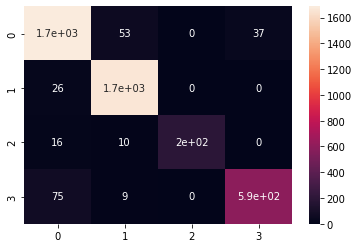

In [7]:
prev, dataframe = Perceptron.predict(train_X, train_y)
hits = n_slrt = n_shrt = n_mf = n_slt = 0
score_slrt = score_shrt = score_mf = score_slt = 0
for j in range(len(train_y)):
    if(train_y[j] == 0): n_slrt += 1
    elif(train_y[j] == 1): n_shrt += 1
    elif(train_y[j] == 2): n_mf += 1
    elif(train_y[j] == 3): n_slt += 1
        
for i in range(len(train_y)):
    if train_y[i] == prev[i]: 
        hits += 1
    if train_y[i] == prev[i] and train_y[i] == 0:
        score_slrt += 1
    elif train_y[i] == prev[i] and train_y[i] == 1:
        score_shrt += 1
    elif train_y[i] == prev[i] and train_y[i] == 2:
        score_mf += 1
    elif train_y[i] == prev[i] and train_y[i] == 3:
        score_slt += 1
            
print("score slrt:", score_slrt)
print("score shrt:", score_shrt)
print("score mf:", score_mf)
print("score slt:", score_slt)
hits = (hits / len(train)) * 100
faults = 100 - hits

Porcents : 94.82 % hits and 5.18 % faults
Total samples of test 4365
Slight-Right-Turn: 1777 samples
Sharp-Right-Turn: 1689 samples
Move-Forward: 221 samples
Slight-Left-Turn: 678 samples


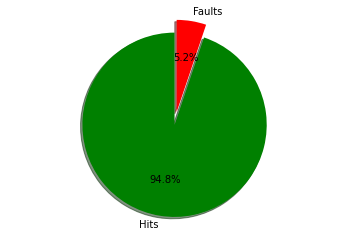

In [8]:
graph_hits = []
print("Porcents :","%.2f"%(hits),"% hits","and","%.2f"%(faults),"% faults")
print("Total samples of test",4365)
print("Slight-Right-Turn:",n_slrt,"samples")
print("Sharp-Right-Turn:",n_shrt,"samples")
print("Move-Forward:",n_mf,"samples")
print("Slight-Left-Turn:",n_slt,"samples")

graph_hits.append(hits)
graph_hits.append(faults)
labels = 'Hits', 'Faults';
sizes = [96.5, 3.3]
explode = (0, 0.14)

fig1, ax1 = plt.subplots();
ax1.pie(graph_hits, explode=explode,colors=['green','red'],labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax1.axis('equal')
plt.show()